### Testing Start

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # 对图像的每个像素值均乘以该数值后再做偏移，实现归一化
    rotation_range=40,  # 随机旋转的度数范围
    width_shift_range=0.2,  # 图片宽度上随机移动的范围，这里的0.2指最多移动图片宽度的20%
    height_shift_range=0.2,  # 图片高度上随机移动的范围，这里的0.2指最多移动图片高度的20%
    shear_range=0.2,  # 剪切强度（逆时针方向的剪切变换角度）
    zoom_range=0.2,  # 随机缩放的幅度
    horizontal_flip=True,  # 随机将图片水平翻转
    fill_mode='nearest',  # 当进行变换时，新出现的像素点如何填充
    validation_split=0.2)  # 从训练数据中划分出20%的数据作为验证数据


In [ ]:
train_generator = train_datagen.flow_from_directory(
    'images',  # 训练数据文件夹路径
    target_size=(100, 100),  # 将所有图片大小调整为100x100
    batch_size=32,  # 每批数据的大小
    class_mode='categorical',  # 由于我们进行多类别分类，使用"分类"模式
    subset='training')  # 指定这是用于训练的数据

validation_generator = train_datagen.flow_from_directory(
    'images',  # 训练数据文件夹路径，同样用于验证数据的提取
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 指定这是用于验证的数据


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 9是类别数量
])


c:\Users\lycym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,651,977 (25.38 MB)

 Trainable params: 6,651,977 (25.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from PIL import Image

history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 这取决于你的数据量和batch_size
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50  
)


Epoch 1/30


c:\Users\lycym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  9/100 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 0.0662 - loss: 2.4851

c:\Users\lycym\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.0692 - loss: 2.4431 - val_accuracy: 0.1831 - val_loss: 2.2049
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.1193 - loss: 2.2862 - val_accuracy: 0.1268 - val_loss: 2.1826
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.1504 - loss: 2.2424 - val_accuracy: 0.1268 - val_loss: 2.1858
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.1305 - loss: 2.2153 - val_accuracy: 0.1408 - val_loss: 2.1846
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.1344 - loss: 2.1945 - val_accuracy: 0.1690 - val_loss: 2.1725
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.1927 - loss: 2.1628 - val_accuracy: 0.1831 - val_loss: 2.1604
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.2269 - loss: 2.1239 - val_accuracy: 0.1972 - val_loss: 2.1583
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.2306 - loss: 2.0933 - val_accuracy: 0.25

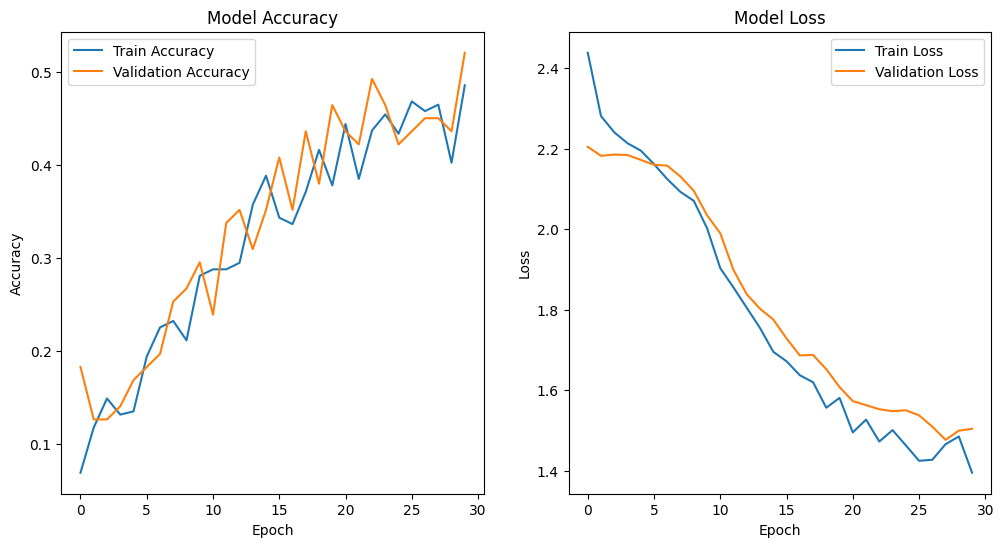

In [ ]:
import matplotlib.pyplot as plt

# 绘制训练和验证的准确率值
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# 绘制训练和验证的损失值
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def prepare_image(image_path):
    img = load_img(image_path, target_size=(100, 100))  # 加载图片并调整大小
    img_array = img_to_array(img)  # 将图片转换为numpy数组
    img_array = img_array / 255.0  # 归一化
    img_array = np.expand_dims(img_array, axis=0)  # 增加批次维度
    return img_array

# 替换为你的图片路径
image_path = 'image.png'
prepared_img = prepare_image(image_path)


In [ ]:
predictions = model.predict(prepared_img)
predicted_class = np.argmax(predictions[0])  # 获取概率最高的类别索引
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # 反转类别索引和类别名称的字典
predicted_class_name = class_labels[predicted_class]  # 获取类别名称
print("Predicted class:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: orange fruit


### Testing End